In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This data contains EEG correlates of genetic predisposition to alcoholism.

# Data Preprocessing

In [2]:
file_names_full = os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full')
file_names_a=[]
file_names_c=[]
for filename in file_names_full:
    if filename.startswith('co2a') or filename.startswith('co3a'):
        file_names_a.append(filename)
    else:
        file_names_c.append(filename)
print(f'This data set contains {len(file_names_a)} alcholic and {len(file_names_c)} control subjects.')

This data set contains 77 alcholic and 45 control subjects.


**Alcholic(a) Subjects**<br>
Extract and merge alcholic(a) subjects. Converting parquet format after that.

In [ ]:
file_names_list=[]
for file in file_names_a:
    file_names_temp=os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full/' + file)
    file_names_temp=[f for f in file_names_temp if not f.endswith('.gz')]
    file_names_list.append(file_names_temp)
file_names_list

In [ ]:
d2 = pl.DataFrame()
output_parquet_file = "C:/Users/bbari/Documents/EEG Analysis/finalize_a.parquet"
for a in range(0,len(file_names_a)):
    for i in range(0,len(file_names_list[a])):
        filename='C:/Users/bbari/Documents/EEG Analysis/eeg_full'+'/'+str(file_names_a[a])+ '/'+str(file_names_list[a][i])
        d1=pl.read_csv(filename,skip_rows=4,separator=" ",ignore_errors=True)
        d1=d1.with_columns(subject_group = pl.lit('a'),subject=pl.lit(str(file_names_a[a])))
        d2=pl.concat([d2,d1])
    print(filename)
d2=d2.rename({"#": "trial_num","FP1": "sensor_position","chan": "sample_num(timestamp)","0": "sensor_value(voltage(mV))"})
d2.write_parquet(output_parquet_file)

In [ ]:
df_a = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/finalize_a.parquet') 
df_a

**Control(c) Subjects**<br>
Extract and merge control(c) subjects. Converting parquet format after that.

In [ ]:
file_names_list_2=[]
for file in file_names_c:
    file_names_temp=os.listdir('C:/Users/bbari/Documents/EEG Analysis/eeg_full/' + file)
    file_names_temp=[f for f in file_names_temp if not f.endswith('.gz')]
    file_names_list_2.append(file_names_temp)
file_names_list_2

In [ ]:
d4 = pl.DataFrame()
output_parquet_file = "C:/Users/bbari/Documents/EEG Analysis/finalize_c.parquet"
for a in range(0,len(file_names_c)):
    for i in range(0,len(file_names_list_2[a])):
        filename='C:/Users/bbari/Documents/EEG Analysis/eeg_full'+'/'+str(file_names_c[a])+ '/'+str(file_names_list_2[a][i])
        d3=pl.read_csv(filename,skip_rows=4,separator=" ",ignore_errors=True)
        d3=d3.with_columns(subject_group = pl.lit('c'),subject=pl.lit(str(file_names_c[a])))
        d4=pl.concat([d4,d3])
    print(filename)
d4=d4.rename({"#": "trial_num","FP1": "sensor_position","chan": "sample_num(timestamp)","0": "sensor_value(voltage(mV))"})
d4.write_parquet(output_parquet_file)

In [ ]:
df_c = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/finalize_c.parquet') 
df_c

**Merge Two Subjects in One DataFrame**

In [5]:
df_merged=pd.concat([df_a,df_c])
df_merged

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
1,0.0,FP1,1.0,-8.433,a,co2a0000364
2,0.0,FP1,2.0,-2.574,a,co2a0000364
3,0.0,FP1,3.0,5.239,a,co2a0000364
4,0.0,FP1,4.0,11.587,a,co2a0000364
...,...,...,...,...,...,...
66182723,119.0,Y,251.0,-37.292,c,co3c0000402
66182724,119.0,Y,252.0,-36.316,c,co3c0000402
66182725,119.0,Y,253.0,-34.363,c,co3c0000402
66182726,119.0,Y,254.0,-33.386,c,co3c0000402


**Drop NaN Rows in DataFrame**

In [6]:
df_merged=df_merged.dropna(subset=['trial_num'])
df_merged

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
1,0.0,FP1,1.0,-8.433,a,co2a0000364
2,0.0,FP1,2.0,-2.574,a,co2a0000364
3,0.0,FP1,3.0,5.239,a,co2a0000364
4,0.0,FP1,4.0,11.587,a,co2a0000364
...,...,...,...,...,...,...
66182723,119.0,Y,251.0,-37.292,c,co3c0000402
66182724,119.0,Y,252.0,-36.316,c,co3c0000402
66182725,119.0,Y,253.0,-34.363,c,co3c0000402
66182726,119.0,Y,254.0,-33.386,c,co3c0000402


**Sort By Trial Number&Sample Number(Timestamp)**

In [7]:
df_merged=df_merged.sort_values(by=["trial_num","sample_num(timestamp)"])
df_merged #trial_num, sample_num(timestamp) to int 0,0 0,1 0,2...

,trial_num,sensor_position,sample_num(timestamp),sensor_value(voltage(mV)),subject_group,subject
0,0.0,FP1,0.0,-8.921,a,co2a0000364
257,0.0,FP2,0.0,0.834,a,co2a0000364
514,0.0,F7,0.0,-19.847,a,co2a0000364
771,0.0,F8,0.0,8.148,a,co2a0000364
1028,0.0,AF1,0.0,-2.146,a,co2a0000364
...,...,...,...,...,...,...
66181699,119.0,P2,255.0,-10.935,c,co3c0000402
66181956,119.0,P1,255.0,-12.146,c,co3c0000402
66182213,119.0,CPZ,255.0,-4.232,c,co3c0000402
66182470,119.0,nd,255.0,-32.939,c,co3c0000402


**Reshape Sensor Values(voltage(mV) in Numpy Array**

In [ ]:
df_pivot = df_merged.pivot_table(index=['trial_num', 'sample_num(timestamp)', 'subject_group', 'subject'],
                          columns='sensor_position',
                          values='sensor_value(voltage(mV))',
                          aggfunc='first').reset_index()

# Displaying Parquet Data

In [2]:
df_pivot = pd.read_parquet('C:/Users/bbari/Documents/EEG Analysis/df_pivot.parquet.gzip')
df_pivot

,trial_num,sample_num(timestamp),subject_group,subject,AF1,AF2,AF7,AF8,AFZ,C1,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0.0,0.0,a,co2a0000364,-2.146,1.129,-16.856,-10.020,-0.987,-1.129,...,5.157,-6.266,-2.797,-6.805,-3.886,-9.338,-3.082,-5.269,-5.636,-8.901
1,0.0,0.0,a,co2a0000368,4.079,2.340,-0.061,4.242,2.391,0.203,...,2.625,-0.753,-0.203,1.770,-0.234,0.285,0.285,0.285,1.536,0.000
2,0.0,0.0,a,co2a0000369,1.617,2.055,1.831,1.485,2.879,0.753,...,4.008,-1.058,-0.651,1.912,5.493,-2.747,6.134,0.458,3.805,-2.350
3,0.0,0.0,a,co2a0000370,-0.183,-0.498,0.702,-1.119,0.468,-0.031,...,5.219,4.272,2.655,2.930,0.946,3.560,1.923,8.250,7.548,3.764
4,0.0,0.0,a,co2a0000371,-0.071,-0.682,-0.610,4.924,-1.241,1.058,...,2.726,0.244,0.997,-4.415,-0.682,-1.780,3.621,2.106,0.173,-1.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830587,119.0,255.0,c,co2c0000394,25.289,25.126,30.141,36.346,25.421,0.722,...,31.291,3.652,4.517,11.556,37.567,3.448,32.308,37.120,21.983,22.786
2830588,119.0,255.0,c,co2c0000395,10.335,4.395,19.613,9.715,6.887,4.700,...,3.601,0.295,2.401,19.501,10.122,15.411,10.803,21.444,31.311,29.785
2830589,119.0,255.0,c,co2c0000397,9.481,9.684,20.162,3.255,5.819,-2.126,...,-23.102,-18.921,-21.576,-12.950,-6.582,-14.537,-3.428,4.781,-2.218,-1.648
2830590,119.0,255.0,c,co2c1000367,8.382,8.911,17.629,15.767,7.243,3.967,...,-24.261,-7.243,-6.978,18.575,3.143,17.161,-7.833,19.826,6.836,-9.003


# Applying PCA Into Dataset

Text(0, 0.5, 'cumulative explained variance')

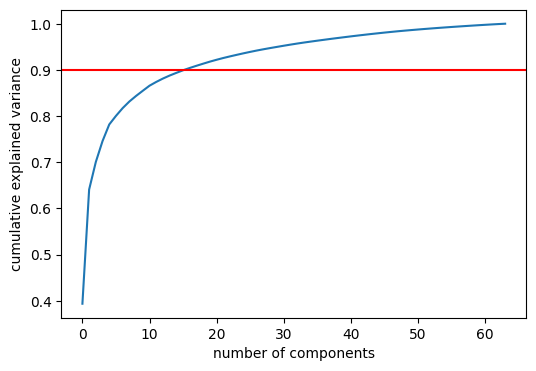

In [3]:
#df_pivot datasetinden kaç principal komponent alırsak, ne kadarlık bir temsil sağlarız
df_pivot_data = df_pivot.iloc[:,4:].values
pca = PCA().fit(df_pivot_data)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90, c="r")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [4]:
# subject_group sütunundaki sınıf dağılımını kontrol edelim
class_counts = df_pivot['subject_group'].value_counts(normalize=True)
print(class_counts)

subject_group
a    0.636068
c    0.363932
Name: proportion, dtype: float64


In [3]:
# distributing the dataset into two components X and Y
X = df_pivot.iloc[:,4:].values #features(voltages)
y = df_pivot.iloc[:,2:3].values #classes/labels(trial_num, sample_num, subject_group, subject) subject_group sütununu kullanıyoruz

#Veri setini Eğitim seti ve Test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0) #stratify ile dengesiz class oranını(a=63%, c=36%) dengeleyelim

#Standart ölçeğe uyum sağlama gibi eğitim ve test setleri üzerinde ön işleme kısmını yapmak
# performing preprocessing part
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA function on training and testing set of X component
pca = PCA(n_components=25) # project from 64 to 25 dimensions (90% temsili için)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
round(sum(explained_variance),3)

0.902

# Logistic Regression

In [6]:
# Lojistik Regresyonu eğitim setine fitting işlemi
log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train, y_train)

# Predicting the test set result using predict function under LogisticRegression
y_pred = log_clf.predict(X_test)

#Y'nin test seti ile tahmin edilen değer arasında confusion matrisinin oluşturulması
cm = confusion_matrix(y_test, y_pred)

correct_predictions = cm.diagonal().sum() # Diagonaldeki doğru tahminleri toplayalım
total_predictions = cm.sum()  # Tüm tahmin değerlerinin toplamı

#Doğru Tahmin Oranı (Accuracy) Hesaplama
acc_log = correct_predictions / total_predictions
print(f'Doğru Tahmin Oranı: {acc_log:.2f}')

C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Doğru Tahmin Oranı: 0.64


In [7]:
acc_log = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy: %",round((acc_log*100),1))

Logistic Regression model accuracy: % 64.0


In [10]:
model = LogisticRegression(random_state=0)

skf = KFold(n_splits=10, shuffle=True, random_state=42) #k=10, shuffle=True verilerin rastgele karıştırılmasını sağlıyor
# Her fold'un özellikle dengesiz class dağılımına sahip veri setlerinde, daha dengeli ve tutarlı olması için

# Cross-validation ile doğrulukları hesaplayalım
accuracies = cross_validate(model, X, y, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1'], n_jobs=-1)

accuracy_scores = scores['test_accuracy']
print("Accuracy skorları:", accuracy_scores)
print("Ortalama accuracy:", accuracy_scores.mean())
print("Accuracy skorlarının standart sapması:", accuracy_scores.std())

Accuracy skorları: [0.64150357 0.64146471 0.64182732 0.64205342 0.64191211 0.64207109
 0.64120908 0.64132919 0.64228659 0.64165068]
Ortalama accuracy: 0.641730775927183
Accuracy skorlarının standart sapması: 0.00033664774288033605


# Random Forest

In [9]:
# Random Forest modelini tanımlama ve eğitme
rand_clf = RandomForestClassifier(random_state=0, n_jobs=-1) #Çoklu İşlem Kullanımı (n_jobs=-1)
rand_clf.fit(X_train, y_train)

# Modeli test seti üzerinde değerlendirme
y_pred = rand_clf.predict(X_test)

# Doğruluk oranını hesaplama ve sonuçları gösterme
acc_ran = accuracy_score(y_test, y_pred)
print(f'Doğru Tahmin Oranı: {acc_ran:.2f}') #tahmini çalışma süresi 15 dakika

C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Doğru Tahmin Oranı: 0.85


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           a       0.83      0.96      0.89    360307
           c       0.91      0.66      0.76    205812

    accuracy                           0.85    566119
   macro avg       0.87      0.81      0.83    566119
weighted avg       0.86      0.85      0.85    566119



# XGBoost

In [16]:
label_encoder = LabelEncoder()

# y'yi sayısal değerlere dönüştürme
#ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['a' 'c']
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
xgb_clf.fit(X_train, y_train_encoded)

y_pred = xgb_clf.predict(X_test)

acc_xgb = accuracy_score(y_test_encoded, y_pred)
print(f'Doğru Tahmin Oranı: {acc_xgb:.2f}')

C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Doğru Tahmin Oranı: 0.74


In [17]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81    360307
           1       0.72      0.47      0.57    205812

    accuracy                           0.74    566119
   macro avg       0.73      0.68      0.69    566119
weighted avg       0.74      0.74      0.73    566119



# Decision Tree Classifier

In [5]:
# Decision Tree modelini tanımlama ve eğitme
dtc_clf = DecisionTreeClassifier(random_state=0)
dtc_clf.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = dtc_clf.predict(X_test)

# Doğruluk oranını hesaplama
acc_dtc = accuracy_score(y_test, y_pred)
print(f'Doğru Tahmin Oranı: {acc_dtc:.2f}') #tahmini çalışma süresi 5 dakika 

Doğru Tahmin Oranı: 0.72


In [ ]:
'''from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtc_clf, filled=True, feature_names=df_pivot.columns[4:], class_names=['a', 'c'], rounded=True)
plt.show()'''

# KNN (K-nearest neighbors)

In [5]:
knn_clf=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn_clf.fit(X_train,y_train)

y_pred=knn_clf.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
cm

C:\Users\bbari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[339361,  20946],
       [ 43153, 162659]], dtype=int64)

In [7]:
acc_knn = accuracy_score(y_test, y_pred)
print(f'Doğru Tahmin Oranı: {acc_knn:.2f}')

Doğru Tahmin Oranı: 0.89
